# Data pH

Dataset harus disiapkan terlebih dahulu, buat csv biasa aja, ubah , menjadi . Lalu hapus sebagai delimiter nanti cukup gunakan , saja

In [6]:
import os
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('ph_Eksponensial.csv', delimiter=',')
df

,index,Volume,Waktu,DeltapH_Prediksi
0,0,40,1,0.157270
1,1,40,2,0.221094
2,2,40,3,0.310820
3,3,40,4,0.436958
4,4,40,5,0.614287
5,0,50,1,0.135015
6,1,50,2,0.186415
7,2,50,3,0.257381
8,3,50,4,0.355365
9,4,50,5,0.490650


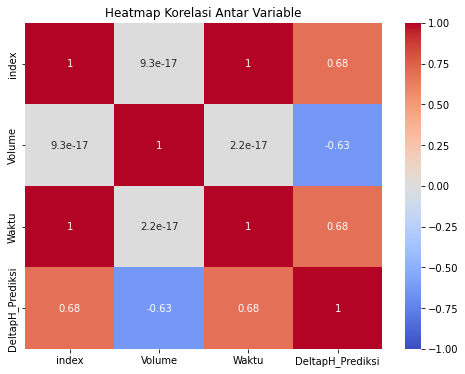

In [7]:
import seaborn as sns

# Menghitung korelasi antar fitur
correlation_matrix = df.corr()

# Menampilkan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Heatmap Korelasi Antar Variable')
plt.show()

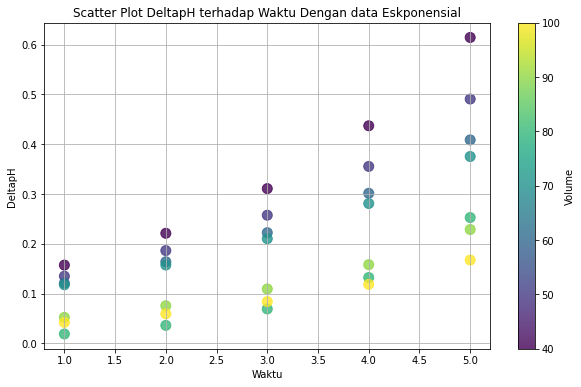

In [9]:
# Plot scatter DeltapH dengan volume sebagai warna
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['Waktu'], df['DeltapH_Prediksi'], c=df['Volume'], cmap='viridis', s=100, alpha=0.8)
plt.colorbar(scatter, label='Volume')
plt.title('Scatter Plot DeltapH terhadap Waktu Dengan data Eskponensial')
plt.xlabel('Waktu')
plt.ylabel('DeltapH')
plt.grid(True)
plt.show()

# Split Data

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[["Volume","DeltapH_Prediksi"]],df["Waktu"],test_size=0.3,random_state=42)
print("Banyaknya data training: ", y_train.shape)
print("Banyaknya data test: ", y_test.shape)

Banyaknya data training:  (24,)
Banyaknya data test:  (11,)


# LinearRegression

In [12]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Membuat model regresi linear
model = LinearRegression()
model.fit(X_train, y_train)

# Melakukan prediksi dengan data test
y_pred = model.predict(X_test)

# Menampilkan koefisien dan intercept dari model
print("Koefisien Volume: ", model.coef_[0])
print("Koefisien DeltapH: ", model.coef_[1])
print("Intercept:", model.intercept_)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nEvaluasi Model:")
print("Mean Squared Error (MSE):", mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print("R-squared:", r2)
print("Model dapat dapat menjelaskan ", r2*100,"% dari variansi dalam data")
print("\n")

volume = 70
ph_awal = 6.6
ph_target = 6
deltaph = ph_awal - ph_target

x1 = volume
x2 = deltaph

a = model.coef_[0]
b = model.coef_[1]
c = model.intercept_

# manual
manual = a*x1 + b*x2 + c 
print("Manual: ", manual)

# pakai model
model = model.predict([[x1,x2]])[0] 
print("Model", model)

# selisih
print("Selisih", manual - model)


Koefisien Volume:  0.047507306618956545
Koefisien DeltapH:  11.048645067511748
Intercept: -2.612778490765361

Evaluasi Model:
Mean Squared Error (MSE): 0.3434755150808158
Root Mean Squared Error (RMSE): 0.5860678417050502
Mean Absolute Error (MAE): 0.5072049772142055
R-squared: 0.8337578507008852
Model dapat dapat menjelaskan  83.37578507008851 % dari variansi dalam data


Manual:  7.341920013068641
Model 7.341920013068641
Selisih 0.0


# Ridge Regression

In [13]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import numpy as np

# Membuat model
rdg = Ridge(alpha = 0.1)
rdg.fit(X_train, y_train)

# Melakukan prediksi dengan data test
y_pred = rdg.predict(X_test)

# Menampilkan koefisien dan intercept dari model
print("Koefisien Volume: ", rdg.coef_[0])
print("Koefisien DeltapH: ", rdg.coef_[1])
print("Intercept: ",rdg.intercept_)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nEvaluasi Model:")
print("Mean Squared Error (MSE):", mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print("R-squared:", r2)
print("Model dapat dapat menjelaskan ", r2*100,"% dari variansi dalam data")
print("\n")

volume = 70
ph_awal = 6.6
ph_target = 6
deltaph = ph_awal - ph_target

x1 = volume
x2 = deltaph

a = rdg.coef_[0]
b = rdg.coef_[1]
c = rdg.intercept_

# manual
manual = a*x1 + b*x2 + c 
print("Manual: ", manual)

# pakai model
model = rdg.predict([[x1,x2]])[0] 
print("Model", model)

# selisih
print("Selisih", manual - model)

Koefisien Volume:  0.03539235904108962
Koefisien DeltapH:  8.018569047699662
Intercept:  -1.1945873964277332

Evaluasi Model:
Mean Squared Error (MSE): 0.6288802549456005
Root Mean Squared Error (RMSE): 0.7930197065304244
Mean Absolute Error (MAE): 0.6972825622880857
R-squared: 0.6956219566063293
Model dapat dapat menjelaskan  69.56219566063294 % dari variansi dalam data


Manual:  6.094019165068335
Model 6.094019165068335
Selisih 0.0


## Ridge Regression With CV

In [14]:
from sklearn.linear_model import RidgeCV

# Membuat model
rdg_cv = RidgeCV([.1,.3,.5,.7,.9,1,10],cv=5)
rdg_cv.fit(X_train,y_train)

# Melakukan prediksi dengan data test
y_pred = rdg_cv.predict(X_test)

# Menampilkan koefisien dan intercept dari model
print("Koefisien Volume: ",rdg_cv.coef_[0])
print("Koefisien DeltapH: ",rdg_cv.coef_[1])
print("Intercept: ", rdg_cv.intercept_)


# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nEvaluasi Model:")
print("Mean Squared Error (MSE):", mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print("R-squared:", r2)
print("Model dapat dapat menjelaskan ", r2*100,"% dari variansi dalam data")
print("\n")

volume = 70
ph_awal = 6.6
ph_target = 6
deltaph = ph_awal - ph_target

x1 = volume
x2 = deltaph

a = rdg_cv.coef_[0]
b = rdg_cv.coef_[1]
c = rdg_cv.intercept_

# manual
manual = a*x1 + b*x2 + c 
print("Manual: ", manual)

# pakai model
model = rdg_cv.predict([[x1,x2]])[0] 
print("Model", model)

# selisih
print("Selisih", manual - model)

Koefisien Volume:  0.03539235904108962
Koefisien DeltapH:  8.018569047699662
Intercept:  -1.1945873964277332

Evaluasi Model:
Mean Squared Error (MSE): 0.6288802549456005
Root Mean Squared Error (RMSE): 0.7930197065304244
Mean Absolute Error (MAE): 0.6972825622880857
R-squared: 0.6956219566063293
Model dapat dapat menjelaskan  69.56219566063294 % dari variansi dalam data


Manual:  6.094019165068335
Model 6.094019165068335
Selisih 0.0


# Lasso

In [15]:
from sklearn.linear_model import Lasso

# Membuat model
lss = Lasso(alpha=0.2)
lss.fit(X_train,y_train)

# Melakukan prediksi dengan data test
y_pred = lss.predict(X_test)

# Menampilkan koefisien dan intercept dari model
print("Koefisien Volume: ", lss.coef_[0])
print("Koefisien DeltapH: ", lss.coef_[1])
print("Intercept: ", lss.intercept_)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nEvaluasi Model:")
print("Mean Squared Error (MSE):", mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print("R-squared:", r2)
print("Model dapat dapat menjelaskan ", r2*100,"% dari variansi dalam data")
print("\n")


# Testing
volume = 70
ph_awal = 6.6
ph_target = 6
deltaph = ph_awal - ph_target

x1 = volume
x2 = deltaph

a = lss.coef_[0]
b = lss.coef_[1]
c = lss.intercept_

# manual
manual = a*x1 + b*x2 + c 
print("Manual: ", manual)

# pakai model
model = lss.predict([[x1,x2]])[0] 
print("Model", model)

# selisih
print("Selisih", manual - model)

Koefisien Volume:  0.0029333333333333325
Koefisien DeltapH:  0.0
Intercept:  2.586333333333333

Evaluasi Model:
Mean Squared Error (MSE): 2.528421767676768
Root Mean Squared Error (RMSE): 1.5901011815846084
Mean Absolute Error (MAE): 1.4364545454545457
R-squared: -0.22375613555555574
Model dapat dapat menjelaskan  -22.375613555555574 % dari variansi dalam data


Manual:  2.7916666666666665
Model 2.7916666666666665
Selisih 0.0


# Lasso CV

In [16]:
from sklearn.linear_model import LassoCV

# Membuat model
lss_cv = LassoCV(alphas=[.1,.3,.5,.7,.9])
lss_cv.fit(X_train,y_train)

# Melakukan prediksi dengan data test
y_pred = lss_cv.predict(X_test)

# Menampilkan koefisien dan intercept dari model
print("Koefisien Volume: ", lss_cv.coef_[0])
print("Koefisien DeltapH: ", lss_cv.coef_[1])
print("Intercept: ", lss_cv.intercept_)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nEvaluasi Model:")
print("Mean Squared Error (MSE):", mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print("R-squared:", r2)
print("Model dapat dapat menjelaskan ", r2*100,"% dari variansi dalam data")
print("\n")


# Testing
volume = 70
ph_awal = 6.6
ph_target = 6
deltaph = ph_awal - ph_target

x1 = volume
x2 = deltaph

a = lss_cv.coef_[0]
b = lss_cv.coef_[1]
c = lss_cv.intercept_

# manual
manual = a*x1 + b*x2 + c 
print("Manual: ", manual)

# pakai model
model = lss_cv.predict([[x1,x2]])[0] 
print("Model", model)

# selisih
print("Selisih", manual - model)

Koefisien Volume:  0.010902947602988756
Koefisien DeltapH:  1.9433438689553397
Intercept:  1.6627971220257753

Evaluasi Model:
Mean Squared Error (MSE): 1.9163473558216644
Root Mean Squared Error (RMSE): 1.3843219841574663
Mean Absolute Error (MAE): 1.2546700860933337
R-squared: 0.07248787978231452
Model dapat dapat menjelaskan  7.248787978231452 % dari variansi dalam data


Manual:  3.592009775608191
Model 3.592009775608191
Selisih 0.0


# ElasticNetCV

In [17]:
from sklearn.linear_model import ElasticNetCV

# Membuat model
eln_cv = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1])
eln_cv.fit(X_train,y_train)

# Melakukan prediksi dengan data test
y_pred = eln_cv.predict(X_test)

# Menampilkan koefisien dan intercept dari model
print("Koefisien Volume: ", eln_cv.coef_[0])
print("Koefisien DeltapH: ", eln_cv.coef_[1])
print("Intercept: ", eln_cv.intercept_)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nEvaluasi Model:")
print("Mean Squared Error (MSE):", mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print("R-squared:", r2)
print("Model dapat dapat menjelaskan ", r2*100,"% dari variansi dalam data")
print("\n")


# Test
volume = 70
ph_awal = 6.6
ph_target = 6
deltaph = ph_awal - ph_target

x1 = volume
x2 = deltaph

a = eln_cv.coef_[0]
b = eln_cv.coef_[1]
c = eln_cv.intercept_

# manual
manual = a*x1 + b*x2 + c 
print("Manual: ", manual)

# pakai model
model = eln_cv.predict([[x1,x2]])[0] 
print("Model", model)

# selisih
print("Selisih", manual - model)

Koefisien Volume:  0.04379205339771382
Koefisien DeltapH:  10.120382259069562
Intercept:  -2.1780471013029943

Evaluasi Model:
Mean Squared Error (MSE): 0.4056401423982003
Root Mean Squared Error (RMSE): 0.6368988478543515
Mean Absolute Error (MAE): 0.542264994967119
R-squared: 0.8036701710792711
Model dapat dapat menjelaskan  80.36701710792711 % dari variansi dalam data


Manual:  6.959625991978706
Model 6.959625991978706
Selisih 0.0


# GridSearchCV

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
params = {
    "max_depth": range(2,10),
    "min_samples_split": range(2,10),
    "min_samples_leaf": range(2,10)
}

dtr = DecisionTreeRegressor()
gs = GridSearchCV(dtr,params)

gs.fit(X_train,y_train)

y_pred_train = gs.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,y_pred_train)))

0.37267799624996495


# SVR

In [18]:
from sklearn.svm import SVR

# Membuat model
svr = SVR(kernel="linear")
svr.fit(X_train,y_train)

# Melakukan prediksi dengan data test
y_pred = svr.predict(X_test)

# Menampilkan koefisien dan intercept dari model
print("Koefisien Volume: ", svr.coef_[0][0])
print("Koefisien DeltapH: ", svr.coef_[0][1])
print("Intercept: ", svr.intercept_[0])

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nEvaluasi Model:")
print("Mean Squared Error (MSE):", mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print("R-squared:", r2)
print("Model dapat dapat menjelaskan ", r2*100,"% dari variansi dalam data")
print("\n")

# Test
volume = 70
ph_awal = 6.6
ph_target = 6
deltaph = ph_awal - ph_target

x1 = volume
x2 = deltaph

a = svr.coef_[0][0]
b = svr.coef_[0][1]
c = svr.intercept_[0]

# manual
manual = a*x1 + b*x2 + c 
print("Manual: ", manual)

# pakai model
model = svr.predict([[x1,x2]])[0] 
print("Model", model)

# selisih
print("Selisih", manual - model)

Koefisien Volume:  0.00968982492656778
Koefisien DeltapH:  1.6435004266640934
Intercept:  1.9928367502028705

Evaluasi Model:
Mean Squared Error (MSE): 1.8206571268521972
Root Mean Squared Error (RMSE): 1.3493172817585184
Mean Absolute Error (MAE): 1.2313440648387457
R-squared: 0.1188019506035366
Model dapat dapat menjelaskan  11.88019506035366 % dari variansi dalam data


Manual:  3.6572247510610705
Model 3.6572247510606686
Selisih 4.0190073491430667e-13


In [20]:
import pandas as pd
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

# Menentukan parameter untuk GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'epsilon': [0.01, 0.1, 0.2, 0.5, 1],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

# Membuat model SVR
svr = SVR()

# Menggunakan GridSearchCV untuk menemukan parameter terbaik
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Menampilkan parameter terbaik
print(f'Parameter terbaik: {grid_search.best_params_}')

# Menggunakan model dengan parameter terbaik
best_model = grid_search.best_estimator_

# Memprediksi dan mengevaluasi model
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Memproyeksikan waktu untuk volume 70 dan DeltapH 0.6
volume_test = 70
deltaph_test = 0.6
prediction = best_model.predict([[volume_test, deltaph_test]])

print(f'Prediksi waktu untuk Volume = {volume_test} dan DeltapH = {deltaph_test} adalah {prediction[0]}')


Parameter terbaik: {'C': 1000, 'epsilon': 0.5, 'kernel': 'linear'}
Mean Squared Error: 0.6593677770252098
Prediksi waktu untuk Volume = 70 dan DeltapH = 0.6 adalah 7.06238307176608


## Regresi Polynomial

In [23]:
from sklearn.preprocessing import PolynomialFeatures

# membuat fitur polinomial
poly = PolynomialFeatures(degree=2)  # Ubah degree sesuai kebutuhan
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

# memodelkan
model = LinearRegression()
model.fit(X_poly_train, y_train)

# melakukan prediksi
y_pred = model.predict(X_poly_test)

# menampilkan koefisien dan intercept
coefficients = model.coef_
intercept = model.intercept_

print("Koefisien dan Intercept:")
print("Intercept:", intercept)
for i in range(len(coefficients)):
    print(f"Koefisien untuk fitur {i}: {coefficients[i]}")

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nEvaluasi Model:")
print("Mean Squared Error (MSE):", mse)
print("R-squared:", r2)
print("Model dapat menjelaskan ", r2*100, "% dari variansi dalam data")
print("\n")

# test
# Test
volume = 70
ph_awal = 6.6
ph_target = 6
deltaph = ph_awal - ph_target

x1 = volume
x2 = deltaph

koef_volume = coefficients[0]
koef_deltaph = coefficients[1]
koef_volume2 = coefficients[2]
koef_deltaph2 = coefficients[3]
koef_voldel = coefficients[4]

volume2 = volume * volume
deltaph2 = deltaph * deltaph

X_test_poly = poly.transform([[x1, x2]])
predicted_time = model.predict(X_test_poly)[0]

# manual
manual = intercept +  (koef_volume * volume) + (koef_deltaph * deltaph) + (koef_volume2 * volume2) + (koef_deltaph2 * deltaph2) 
print("Manual: ", manual)

# pakai model
print("Model", predicted_time)

Koefisien dan Intercept:
Intercept: -0.7604545696844918
Koefisien untuk fitur 0: 0.0
Koefisien untuk fitur 1: 0.008106951563138476
Koefisien untuk fitur 2: 5.080251488627309
Koefisien untuk fitur 3: 0.00012186180237050782
Koefisien untuk fitur 4: 0.14025853117344497
Koefisien untuk fitur 5: -3.5765187975796815

Evaluasi Model:
Mean Squared Error (MSE): 0.6732788712235156
R-squared: 0.7000848664549795
Model dapat menjelaskan  70.00848664549795 % dari variansi dalam data


Manual:  24892.476747745317
Model 8.055617306683075


## Regresi Linear Tingkat Lanjut dengan Statsmodel

In [24]:
import statsmodels.api as sm
from tabulate import tabulate

# Menambahkan konstanta untuk intercept
X = sm.add_constant(df[['Volume', 'DeltapH']])
y = df['Waktu']

# Membuat model regresi linear
model = sm.OLS(y, X).fit()

# Menampilkan ringkasan model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Waktu   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     49.34
Date:                Sat, 24 Aug 2024   Prob (F-statistic):           1.67e-10
Time:                        22:53:24   Log-Likelihood:                -37.169
No. Observations:                  35   AIC:                             80.34
Df Residuals:                      32   BIC:                             85.00
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.6974      0.729     -3.699      0.0

In [25]:
# testing prediksi
volume_test = 70
deltaph_test = 0.6

# Membbuat prediksi dengan model
X_test = pd.DataFrame({'const': 1, 'Volume': [volume_test], 'DeltapH': [deltaph_test]})
predicted_time = model.predict(X_test)
print(f'Predicted Waktu untuk Volume {volume_test} liter dan DeltapH {deltaph_test} adalah: {predicted_time[0]:.2f} detik')

Predicted Waktu untuk Volume 70 liter dan DeltapH 0.6 adalah: 7.46 detik


In [118]:
# Membuat prediksi
ph['Predicted_Waktu']

# Menampilkan tabel prediksi
print("\nTabel Prediksi Waktu:")
print(tabulate(df, headers='keys', tablefmt='pretty', showindex=False))


Tabel Prediksi Waktu:
+--------+-------+---------------------+-----------------------+
| Volume | Waktu |       DeltapH       |    Predicted_Waktu    |
+--------+-------+---------------------+-----------------------+
|  40.0  |  1.0  |        0.13         |  0.19921428571428565  |
|  40.0  |  2.0  | 0.21000000000000002 |  0.2662142857142857   |
|  40.0  |  3.0  |        0.32         |  0.3332142857142857   |
|  40.0  |  4.0  |        0.48         |  0.40021428571428563  |
|  40.0  |  5.0  |        0.59         |  0.4672142857142857   |
|  50.0  |  1.0  | 0.12000000000000002 |  0.1561428571428571   |
|  50.0  |  2.0  |        0.18         |  0.2231428571428571   |
|  50.0  |  3.0  |        0.27         |  0.2901428571428571   |
|  50.0  |  4.0  |        0.37         |  0.3571428571428571   |
|  50.0  |  5.0  |        0.48         |  0.4241428571428571   |
|  60.0  |  1.0  |         0.1         |  0.11307142857142854  |
|  60.0  |  2.0  |        0.16         |  0.18007142857142855  |
| 